<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-10-21 21:50:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  63.7MB/s    in 3.2s    

2025-10-21 21:50:25 (63.7 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 163.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 192.1 MB/s eta 0:00:00


In [10]:
!pip install matplotlib
!pip install seaborn

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


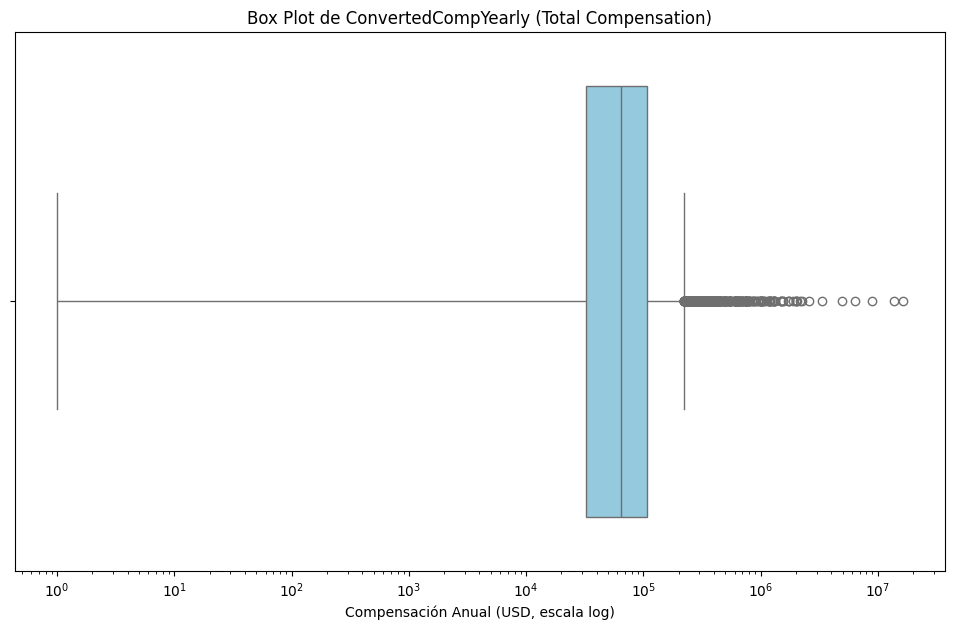

In [11]:
# your code goes here
# Activar modo inline
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Leer ConvertedCompYearly
QUERY = """
SELECT ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Filtrar valores válidos
df = df[df['ConvertedCompYearly'] > 0]

# Box plot de compensación
plt.figure(figsize=(12,7))
sns.boxplot(x=df['ConvertedCompYearly'], color='skyblue')
plt.xscale('log')  # escala logarítmica para valores muy altos
plt.title('Box Plot de ConvertedCompYearly (Total Compensation)')
plt.xlabel('Compensación Anual (USD, escala log)')
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


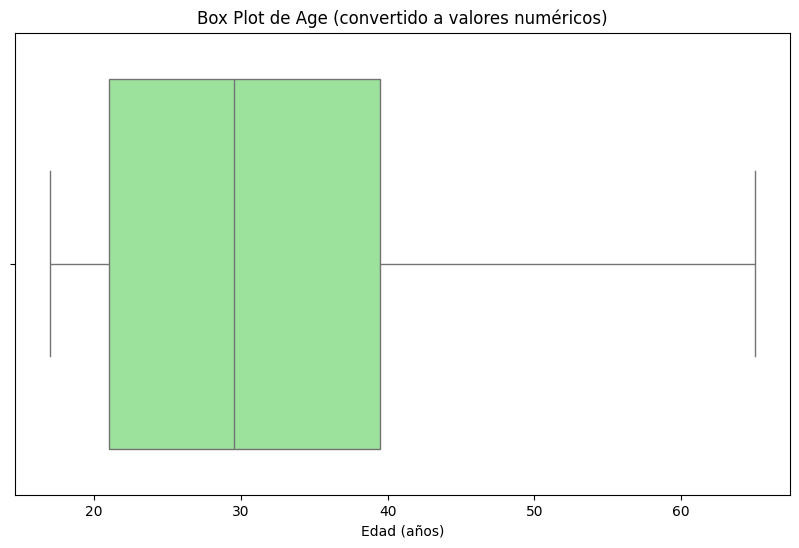

In [12]:
# your code goes here
# Activar modo inline
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Leer Age
QUERY = "SELECT Age FROM main WHERE Age IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

# Función para convertir rangos de edad a valor numérico (punto medio)
def age_to_numeric(age_str):
    age_str = age_str.strip().lower()
    if age_str == 'under 18 years old':
        return 17
    elif age_str == '65 years or older' or age_str == '65+ years old':
        return 65
    else:
        try:
            parts = age_str.split('-')
            if len(parts) == 2:
                start = int(parts[0])
                end = int(parts[1].split()[0])  # eliminar "years old"
                return (start + end) / 2
        except:
            return None

# Convertir Age a numérico
df['AgeNum'] = df['Age'].apply(age_to_numeric)
df = df.dropna(subset=['AgeNum'])

# Box plot de Age
plt.figure(figsize=(10,6))
sns.boxplot(x=df['AgeNum'], color='lightgreen')
plt.title('Box Plot de Age (convertido a valores numéricos)')
plt.xlabel('Edad (años)')
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


Categorías de Age disponibles:
Age
25-34 years old       10369
35-44 years old        6231
18-24 years old        3433
45-54 years old        2329
55-64 years old         863
65 years or older       137
Under 18 years old       64
Prefer not to say         9
Name: count, dtype: int64


/tmp/ipykernel_299/2800391146.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='ConvertedCompYearly', data=df, palette='Set3')


Text(0.5, 1.0, 'Distribución de ConvertedCompYearly')

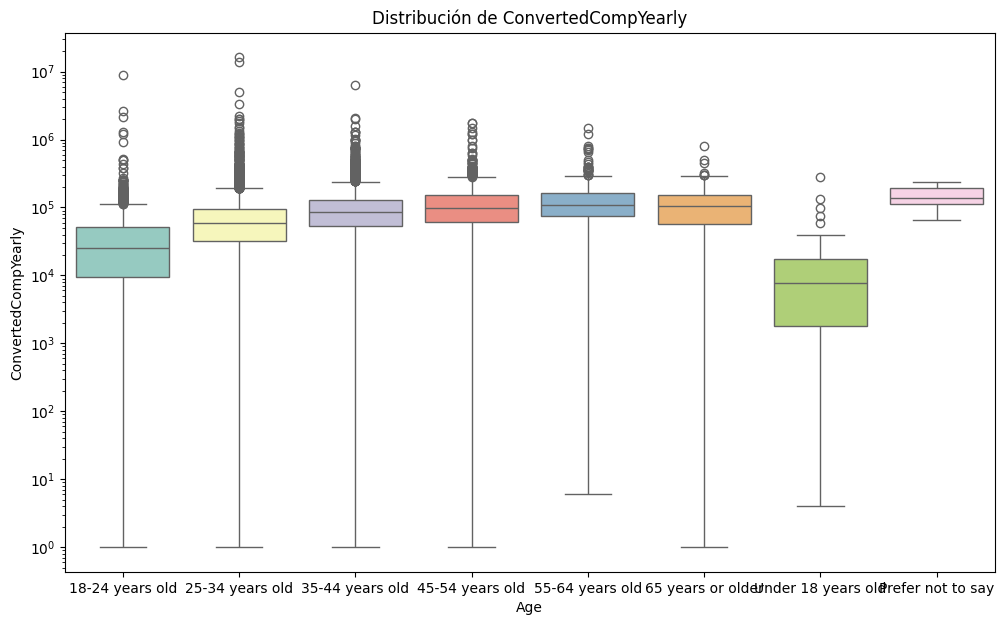

In [14]:
# your code goes here
# Activar modo inline
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Leer Age y ConvertedCompYearly
QUERY = """
SELECT Age, ConvertedCompYearly
FROM main
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Filtrar valores válidos de compensación
df = df[df['ConvertedCompYearly'] > 0]

# Revisar las categorías de Age
print("Categorías de Age disponibles:")
print(df['Age'].value_counts())

# Box plot de compensación por grupo de edad
plt.figure(figsize=(12,7))
sns.boxplot(x='Age', y='ConvertedCompYearly', data=df, palette='Set3')
plt.yscale('log')  # Escala logarítmica para compensaciones altas
plt.title('Distribución de ConvertedCompYearly')


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


Valores únicos de JobSatPoints_6:
[ 65.    0.   20.   30.   25.   50.   10.    5.   15.   18.   40.   35.
  33.   80.  100.    2.   90.   45.   34.   16.   70.    7.   85.   60.
   1.    9.   14.   31.   12.   11.   23.   28.   75.    8.   81.    6.
  13.   55.    3.   22.   42.    4.   89.   99.   12.5  36.   27.   17.
  95.   21.   24.   19.   87.   88.   29.   33.3  37.   39.   77.   68.
  26.   32.   66.   82.   94.   78.   61.   43.   69.   73.   17.5  46.
  49.   52.   97.   96.   67.   91.   86.   56.   98.   41.   74. ]


/tmp/ipykernel_299/3473083.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatPoints_6', y='ConvertedCompYearly', data=df, palette='coolwarm')


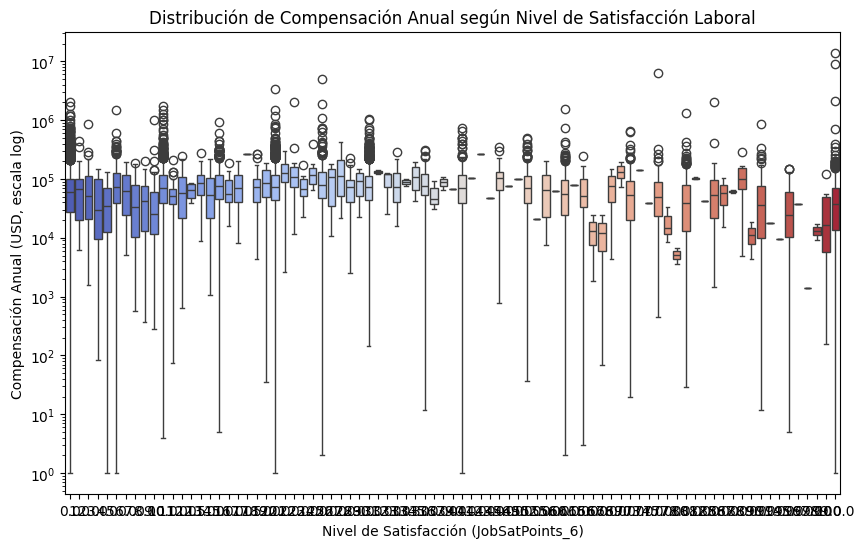

In [15]:
# your code goes here
# Activar modo inline
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta de datos relevantes
QUERY = """
SELECT JobSatPoints_6, ConvertedCompYearly
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Filtrar compensaciones válidas
df = df[df['ConvertedCompYearly'] > 0]

# Mostrar valores únicos de satisfacción
print("Valores únicos de JobSatPoints_6:")
print(df['JobSatPoints_6'].unique())

# Box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='JobSatPoints_6', y='ConvertedCompYearly', data=df, palette='coolwarm')
plt.yscale('log')  # escala logarítmica por los valores extremos
plt.title('Distribución de Compensación Anual según Nivel de Satisfacción Laboral')
plt.xlabel('Nivel de Satisfacción (JobSatPoints_6)')
plt.ylabel('Compensación Anual (USD, escala log)')
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [16]:
# your code goes here
# Activar modo inline
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Cargar las columnas necesarias
QUERY = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Filtrar compensaciones válidas (>0)
df = df[df['ConvertedCompYearly'] > 0]

# Algunos registros tienen múltiples roles separados por punto y coma (;)
# Los separamos en filas individuales
df = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')
df['DevType'] = df['DevType'].str.strip()  # eliminar espacios extra

# Calcular los 5 tipos de desarrollador más comunes
top5_roles = df['DevType'].value_counts().head(5).index.tolist()
print("Top 5 tipos de desarrolladores:")
print(top5_roles)

# Filtrar solo los top 5
df_top5 = df[df['DevType'].isin(top5_roles)]

# Crear el box plot
plt.figure(figsize=(12,7))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top5, palette='viridis')
plt.yscale('log')  # Escala logarítmica para compensaciones altas
plt.title('Distribución de Compensación Anual por Tipo de Desarrollador (Top 5)')
plt.xlabel('Tipo de Desarrollador')
plt.ylabel('Compensación Anual (USD, escala log)# Activar modo inline
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Cargar las columnas necesarias
QUERY = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Filtrar compensaciones válidas (>0)
df = df[df['ConvertedCompYearly'] > 0]

# Algunos registros tienen múltiples roles separados por punto y coma (;)
# Los separamos en filas individuales
df = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')
df['DevType'] = df['DevType'].str.strip()  # eliminar espacios extra

# Calcular los 5 tipos de desarrollador más comunes
top5_roles = df['DevType'].value_counts().head(5).index.tolist()
print("Top 5 tipos de desarrolladores:")
print(top5_roles)

# Filtrar solo los top 5
df_top5 = df[df['DevType'].isin(top5_roles)]

# Crear el box plot
plt.figure(figsize=(12,7))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top5, palette='viridis')
plt.yscale('log')  # Escala logarítmica para compensaciones altas
plt.title('Distribución de Compensación Anual por Tipo de Desarrollador (Top 5)')
plt.xlabel('Tipo de Desarrollador')
plt.ylabel('Compensación Anual (USD, escala log)



SyntaxError: unterminated string literal (detected at line 43) (353487193.py, line 43)

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [ ]:
# your code goes here

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [ ]:
# your code goes here

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# your code goes here

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
